In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from seaborn import heatmap
from seaborn import histplot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [73]:
# Charger l'ensemble de données
data = pd.read_csv('FileDataset/spam_or_not_spam.csv', encoding='latin')

In [74]:
# Affichage de l'ensemble de données
data

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [75]:
# Affichage les 10 premières lignes
data.head(10)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


In [76]:
# Affichage les 10 dernières lignes
data.tail(10)

,email,label
2990,get NUMBER free vhs or dvds click hyperlink h...,1
2991,get NUMBER free vhs or dvds click hyperlink h...,1
2992,wealth without risk discover the best kept se...,1
2993,attn sir madan strictly confidential i am plea...,1
2994,from mr desmond stevens urgent assistance you...,1
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional å­ ä»¶ NUM...,1


In [77]:
# Affichage les informations sur les colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [78]:
# Affchage les colonnes de l'ensemble de données
data.columns

Index(['email', 'label'], dtype='object')

In [79]:
# Affichage les types de données des colonnes
data.dtypes

email    object
label     int64
dtype: object

In [80]:
#Affichage les statistiques descriptives
data.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [81]:
# Affichage de la forme (nombre de lignes, nombre de colonnes) du DataFrame
data.shape

(3000, 2)

In [82]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())  #

email    1
label    0
dtype: int64


In [83]:
# Remplir les valeurs manquantes avec la méthode de remplissage vers l'avant (forward fill)
data['email'].fillna(method='ffill', inplace=True)

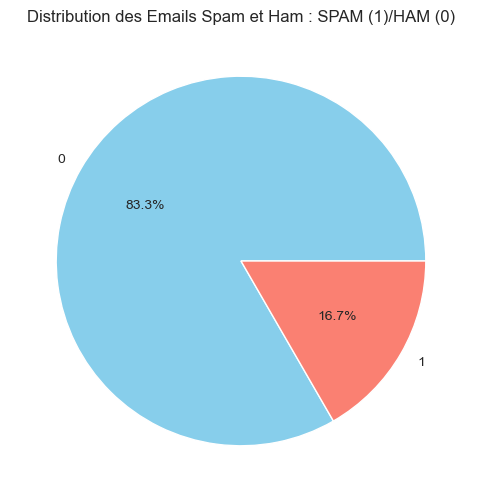

In [84]:
# Visualiser la distribution des emails spam et ham
plt.figure(figsize=(6, 6))
spam_ham = data['label'].value_counts()
spam_ham.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribution des Emails Spam et Ham : SPAM (1) / HAM (0)')
plt.ylabel('')
plt.show()

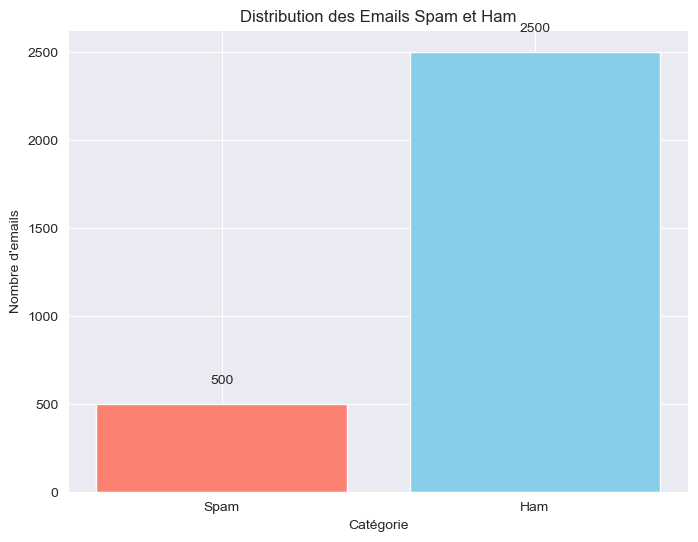

In [85]:
# Amélioration de la visualisation de la distribution des emails spam et ham
plt.figure(figsize=(8, 6))

# Obtenir le nombre d'échantillons pour chaque catégorie
spam_count = data['label'].value_counts()[1]
ham_count = data['label'].value_counts()[0]
plt.bar(['Spam', 'Ham'], [spam_count, ham_count], color=['salmon', 'skyblue'])

for i, count in enumerate([spam_count, ham_count]):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')
    
plt.title('Distribution des Emails Spam et Ham')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'emails')
plt.show()

In [86]:
# Séparer les données en caractéristiques (X) et cible (y)
X = data['email']
y = data['label']

In [87]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Vectoriser les emails
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [89]:
# Entraîner le modèle SVM
model = SVC()
model.fit(X_train, y_train)
# Faire des prédictions
y_pred = model.predict(X_test)

In [90]:
# Évaluer le modèle
print("Score de Précision:", model.score(X_test, y_test))
print("\nRapport de Classification:\n", classification_report(y_test, y_pred))

Score de Précision: 0.9566666666666667

Rapport de Classification:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       505
           1       1.00      0.73      0.84        95

    accuracy                           0.96       600
   macro avg       0.98      0.86      0.91       600
weighted avg       0.96      0.96      0.95       600


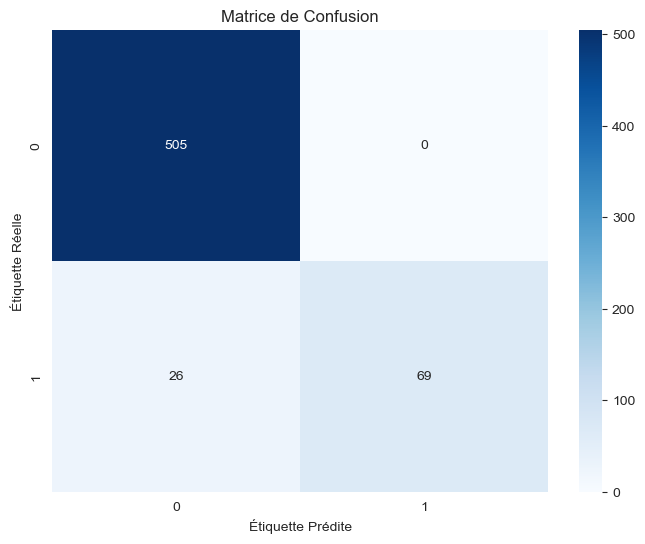

In [91]:
# Affichage de la matrice de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Étiquette Prédite')
plt.ylabel('Étiquette Réelle')
plt.show()

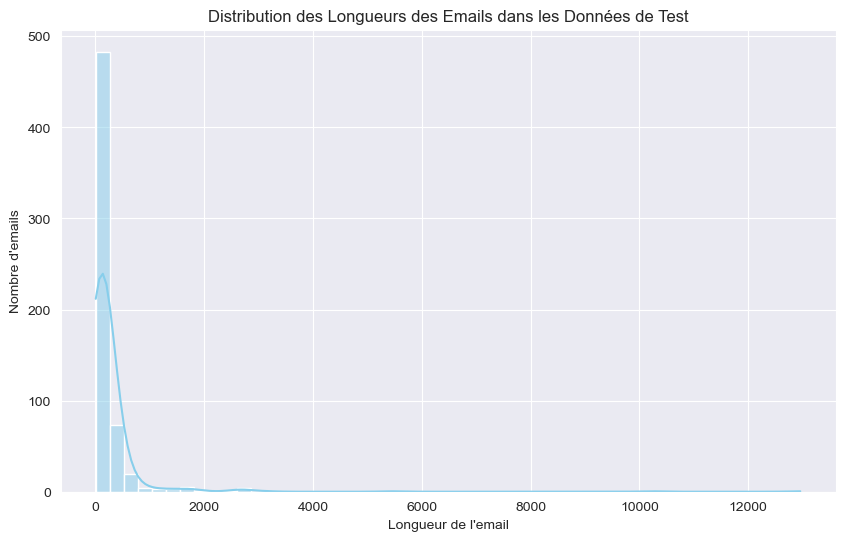

In [92]:
# Créer un modèle KNN
# Visualiser la distribution des longueurs des emails dans les données de test
plt.figure(figsize=(10, 6))
email_lengths_test = X_test.sum(axis=1).A1
histplot(email_lengths_test, bins=50, kde=True, color='skyblue')
plt.title('Distribution des Longueurs des Emails dans les Données de Test')
plt.xlabel('Longueur de l\'email')
plt.ylabel('Nombre d\'emails')
plt.show()

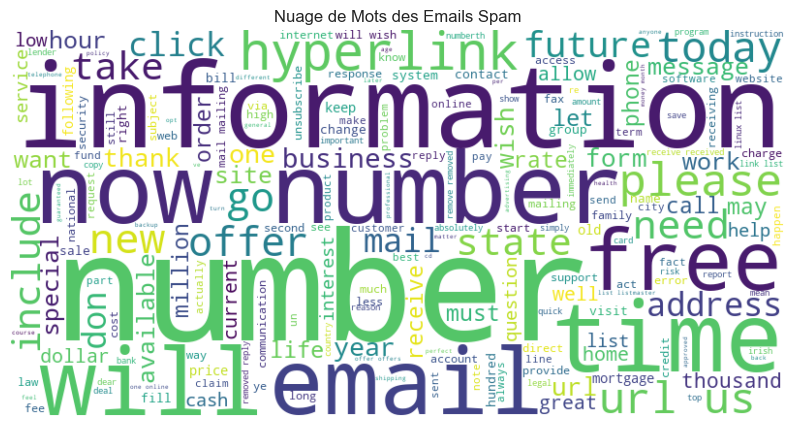

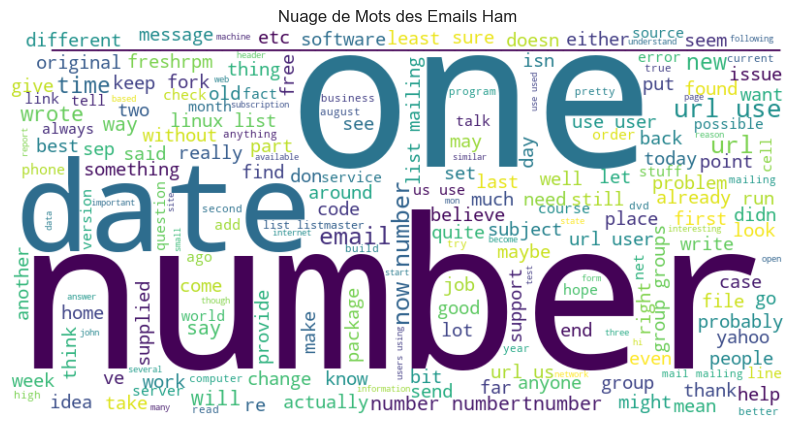

In [93]:
# Fonction pour générer un nuage de mots à partir du texte partie SPAM
def generate_spam_wordcloud(text):
    text = [' '.join(words) for words in text]
    text = ' '.join(text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuage de Mots des Emails Spam')
    plt.show()

# Fonction pour générer un nuage de mots à partir du texte partie HAM
def generate_ham_wordcloud(text):
    text = [' '.join(words) for words in text]
    text = ' '.join(text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuage de Mots des Emails Ham')
    plt.show()

# Convertir la matrice creuse des données de test en une liste de mots
test_spam_words = cv.inverse_transform(X_test[y_test == 1])
test_ham_words = cv.inverse_transform(X_test[y_test == 0])

# Générer et afficher les nuages de mots
generate_spam_wordcloud(test_spam_words)
generate_ham_wordcloud(test_ham_words)

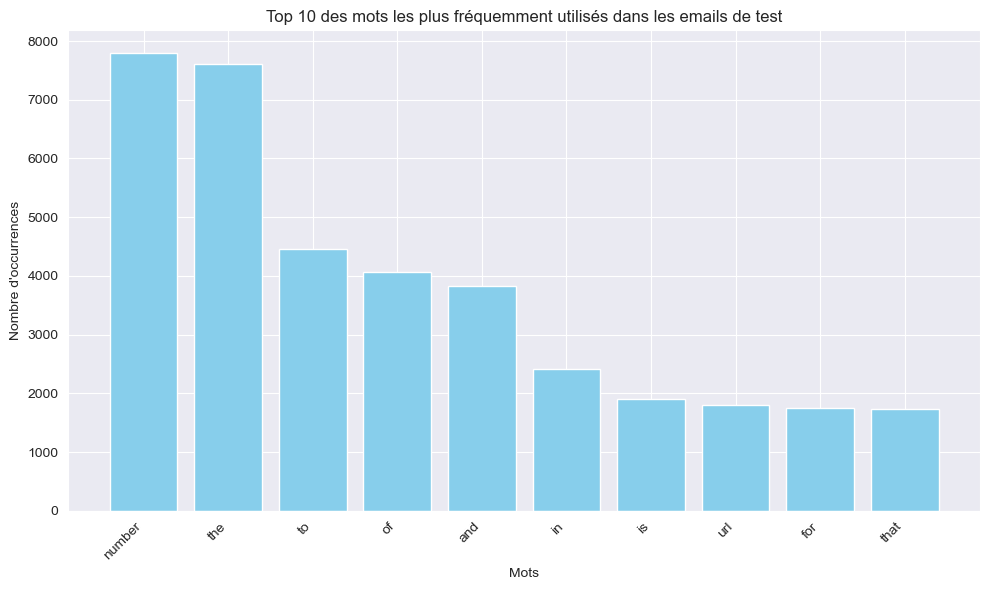

In [94]:
# Fonction pour trouver les mots les plus fréquemment utilisés
def find_top_words(X, cv, top_n=10):
    word_counts = X.sum(axis=0)
    words = cv.get_feature_names_out()
    word_count_dict = dict(zip(words, word_counts.tolist()[0]))
    sorted_word_counts = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)
    top_words = sorted_word_counts[:top_n]
    return top_words

# Appel de la fonction pour obtenir les mots les plus fréquemment utilisés
top_words = find_top_words(X_test, cv, top_n=10)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Afficher les mots les plus fréquemment utilisés
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 des mots les plus fréquemment utilisés dans les emails de test')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 des mots les plus représentatifs pour chaque sujet :
Topic 1:
number world said states people new united technology security bush
Topic 2:
number url exmh date like just users list message don
Topic 3:
url number spamassassin spam razor email mail list talk mailing
Topic 4:
number url list rpm use date numbertnumber mailing wrote perl
Topic 5:
number url people fork just wrote don like think mailto


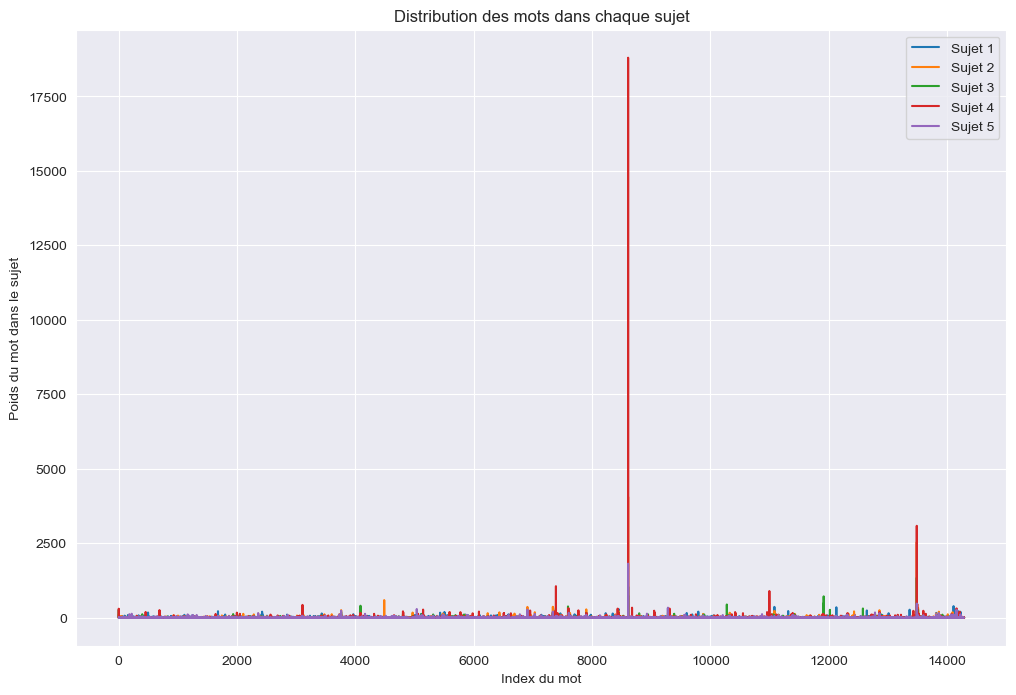

In [95]:
# Filtrer les e-mails classés comme spam et supprimer les valeurs nulles
spam_emails = data[data['label'] == 0]['email'].dropna()
# Convertir les e-mails en minuscules pour une analyse uniforme
spam_emails = spam_emails.str.lower()
# Vectorisation des e-mails
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(spam_emails)
# Appliquer LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Afficher les mots les plus représentatifs pour chaque sujet
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# Afficher les mots les plus représentatifs pour chaque sujet identifié par le modèle LDA.
no_top_words = 10
print("Top 10 des mots les plus représentatifs pour chaque sujet :")
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

# Visualiser les sujets avec leur distribution de probabilité
plt.figure(figsize=(12, 8))
for topic_idx, topic in enumerate(lda.components_):
    plt.plot(topic, label="Sujet %d" % (topic_idx + 1))
    
plt.xlabel("Index du mot")
plt.ylabel("Poids du mot dans le sujet")
plt.title("Distribution des mots dans chaque sujet")
plt.legend()
plt.show()